In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Step 1

In [66]:
df = pd.read_csv(r"C:\Users\User\Desktop\Python Code\Naive Bayes Algorithm\American_Salary.csv")
df.head()

,Age,workclass,fnlwgt,education,Martial_status,occupation,relationship,race,Gender,hours_per_week,Native_Country,Salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   Martial_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   Gender          32561 non-null  object
 9   hours_per_week  32561 non-null  int64 
 10  Native_Country  32561 non-null  object
 11  Salary          32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


# Step 2 :- EDA  or Data Pre-Processing 

#### * Conversion of Level 

In [68]:
cat_var = ["workclass","education","Martial_status","occupation","relationship","race","Gender","Salary","Native_Country"]
for i in cat_var:
    print(i)
    print(df[i].value_counts())
    

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
Martial_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Martial_status, dtype: int64
occupation
 Prof-specialty       41

## Marital Status

In [69]:
df.Martial_status = df.Martial_status.str.strip()

df.loc[(df.Martial_status == 'Never-married'), 'Martial_status'] = 'Single' 
df.loc[(df.Martial_status == 'Widowed'), 'Martial_status'] = 'Single'
df.loc[(df["Martial_status"] == "Married-civ-spouse")|(df["Martial_status"]== "Married-AF-spouse")|(df["Martial_status"]== "Married-spouse-absent"),"Martial_status"] = "Married"
df.loc[(df.Martial_status == 'Separated'), 'Martial_status'] = 'Divorced' 

print(df["Martial_status"].value_counts())
df.Martial_status.unique()

Married     15417
Single      11676
Divorced     5468
Name: Martial_status, dtype: int64


array(['Single', 'Married', 'Divorced'], dtype=object)

## Workclass

In [70]:
df["workclass"] = df.workclass.str.strip()

df.loc[(df.workclass == 'State-gov'),'workclass']='Government'
df.loc[(df.workclass == 'Federal-gov'),'workclass']='Government'
df.loc[(df.workclass == 'Local-gov'),'workclass']='Government'
df.loc[(df.workclass == 'Self-emp-inc'),'workclass']='Self Employed'
df.loc[(df.workclass == 'Self-emp-not-inc'),'workclass']='Self Employed'
df.loc[(df.workclass == '?'),'workclass']='Others'
df.loc[(df.workclass == 'Without-pay'),'workclass']='Others'
df.loc[(df.workclass == 'Never-worked'),'workclass']='Others'

print(df.workclass.value_counts())
df.workclass.unique()

Private          22696
Government        4351
Self Employed     3657
Others            1857
Name: workclass, dtype: int64


array(['Government', 'Self Employed', 'Private', 'Others'], dtype=object)

## Relationship

In [71]:
df["relationship"]=df.relationship.str.strip()

df.loc[(df.relationship == 'Wife'),'relationship']='Family'
df.loc[(df.relationship == 'Husband'),'relationship']='Family'
df.loc[(df.relationship == 'Own-child'),'relationship']='Family'

print(df.relationship.value_counts())
df.relationship.unique()

Family            19829
Not-in-family      8305
Unmarried          3446
Other-relative      981
Name: relationship, dtype: int64


array(['Not-in-family', 'Family', 'Unmarried', 'Other-relative'],
      dtype=object)

## Education

In [72]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [73]:
df["education"]=df.education.str.strip()

df.loc[(df.education == '12th'),'education'] = 'High School'
df.loc[(df.education == '11th'),'education'] = 'High School'
df.loc[(df.education == '1st-4th'),'education'] = 'School'
df.loc[(df.education == '5th-6th'),'education'] = 'School'
df.loc[(df.education == '7th-8th'),'education'] = 'School'
df.loc[(df.education == '9th'),'education'] = 'School'
df.loc[(df.education == '10th'),'education'] = 'School'
df.loc[(df.education == 'Some-college'), 'education'] = 'Bachelors'
df.loc[(df.education == 'HS-grad'), 'education'] = 'Bachelors'
df.loc[(df.education == 'Prof-school'), 'education'] = 'School'
df.loc[(df.education == 'Preschool'), 'education'] = 'School'
df.loc[(df.education == 'Assoc-acdm'), 'education'] = 'Others'
df.loc[(df.education == 'Assoc-voc'), 'education'] = 'Others'

print(df.education.value_counts())
df.education.unique()

Bachelors      23147
School          3221
Others          2449
Masters         1723
High School     1608
Doctorate        413
Name: education, dtype: int64


array(['Bachelors', 'High School', 'Masters', 'School', 'Others',
       'Doctorate'], dtype=object)

# Identify & Outlier Treatment 

<AxesSubplot:>

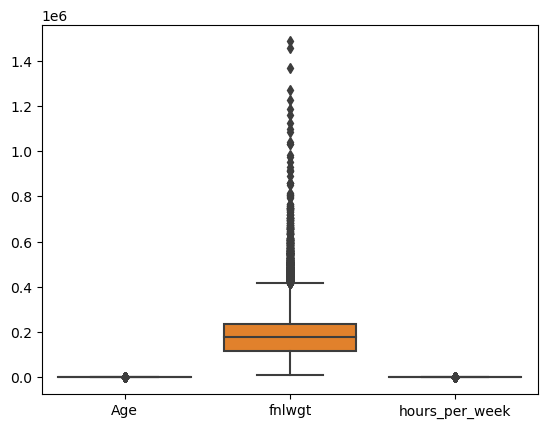

In [74]:
sns.boxplot(data=df)

In [75]:
for i in df:
    if df[i].dtypes in ("float64","int64"):
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:>

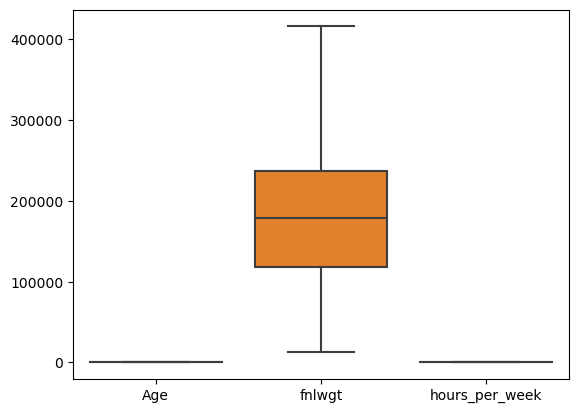

In [76]:
sns.boxplot(data=df)

# Step 3:-  Data Visualization

In [77]:
cat_var

['workclass',
 'education',
 'Martial_status',
 'occupation',
 'relationship',
 'race',
 'Gender',
 'Salary',
 'Native_Country']

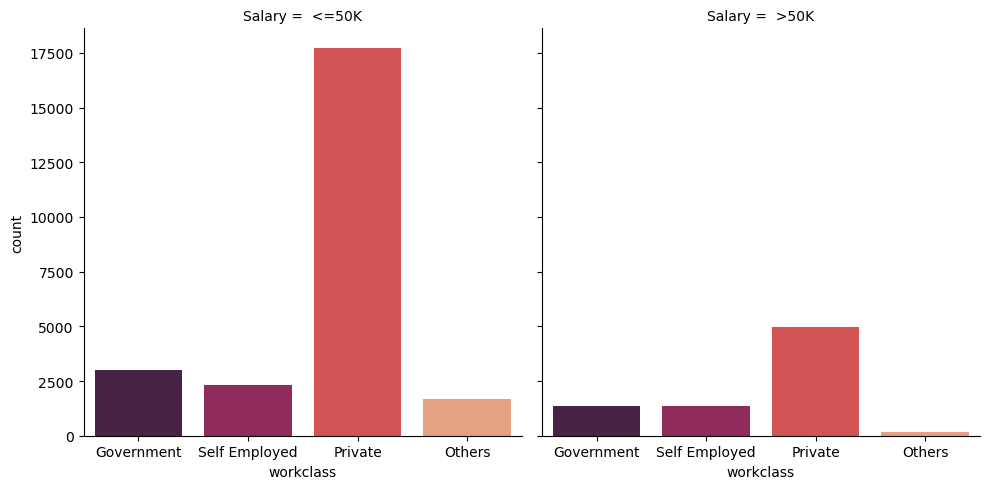

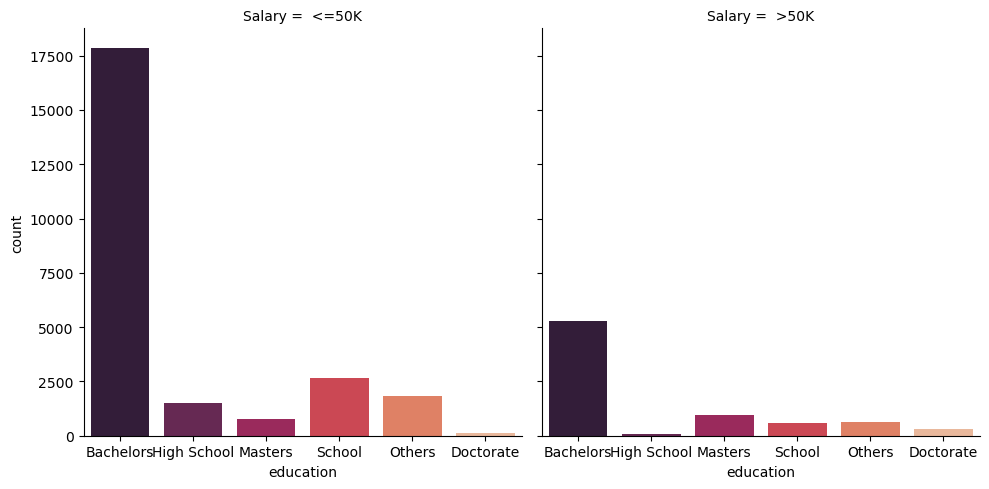

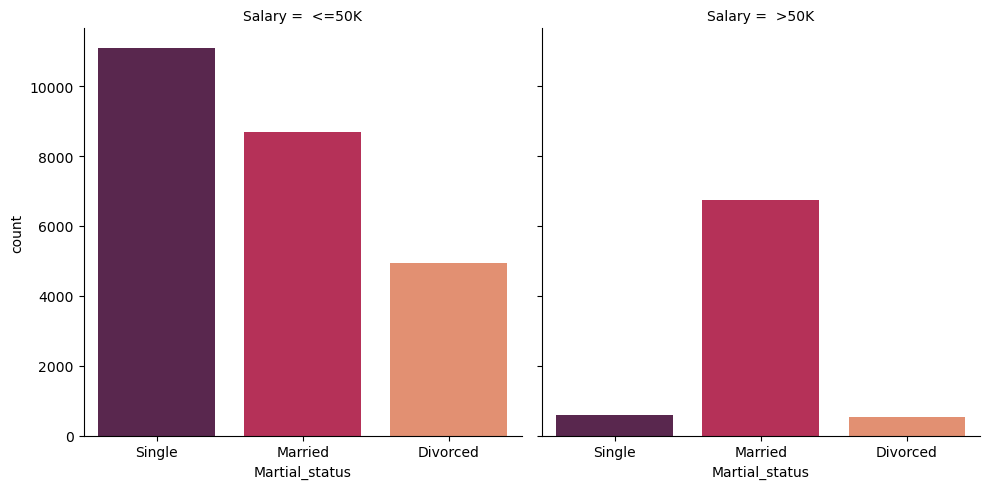

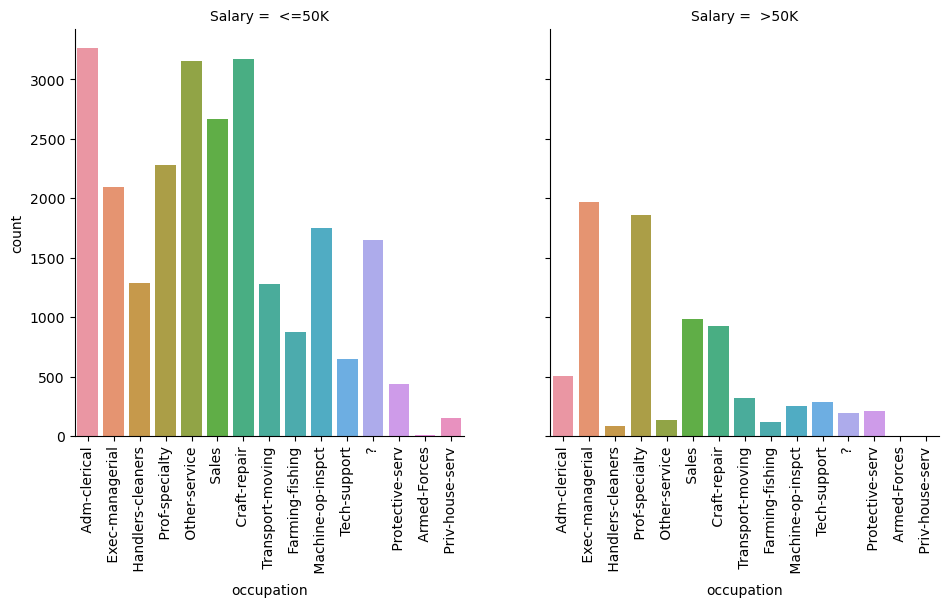

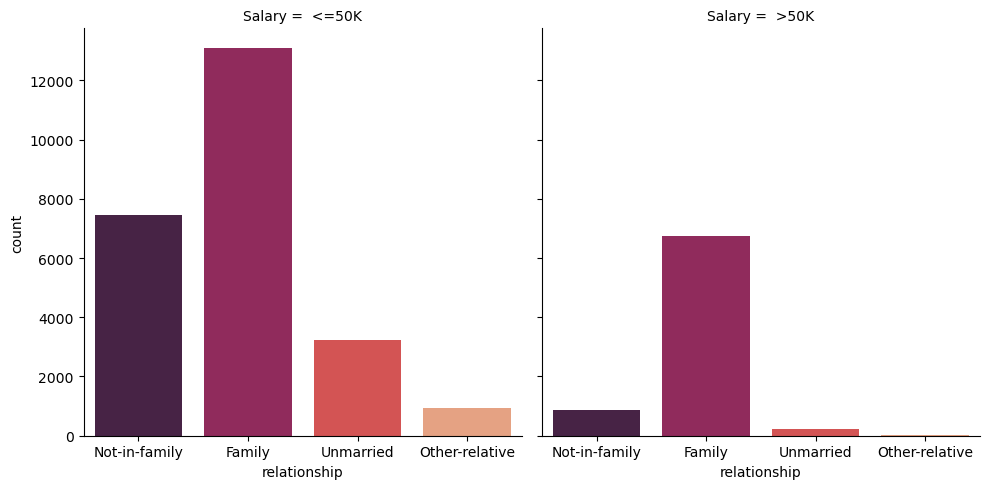

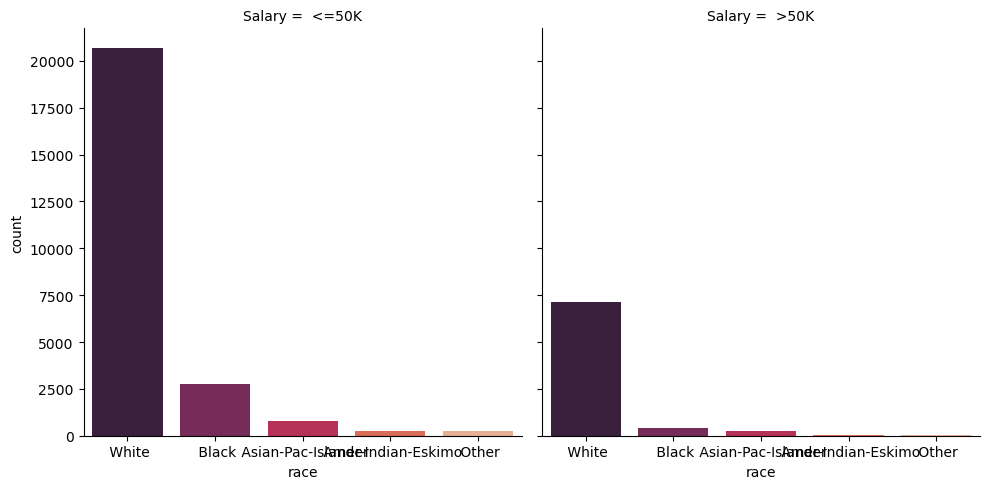

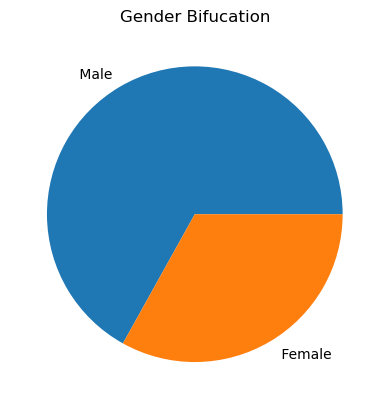

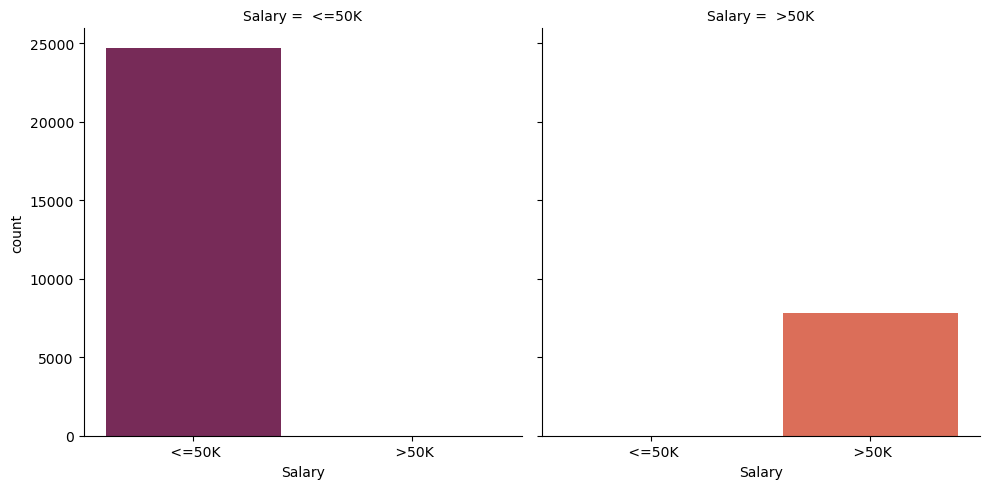

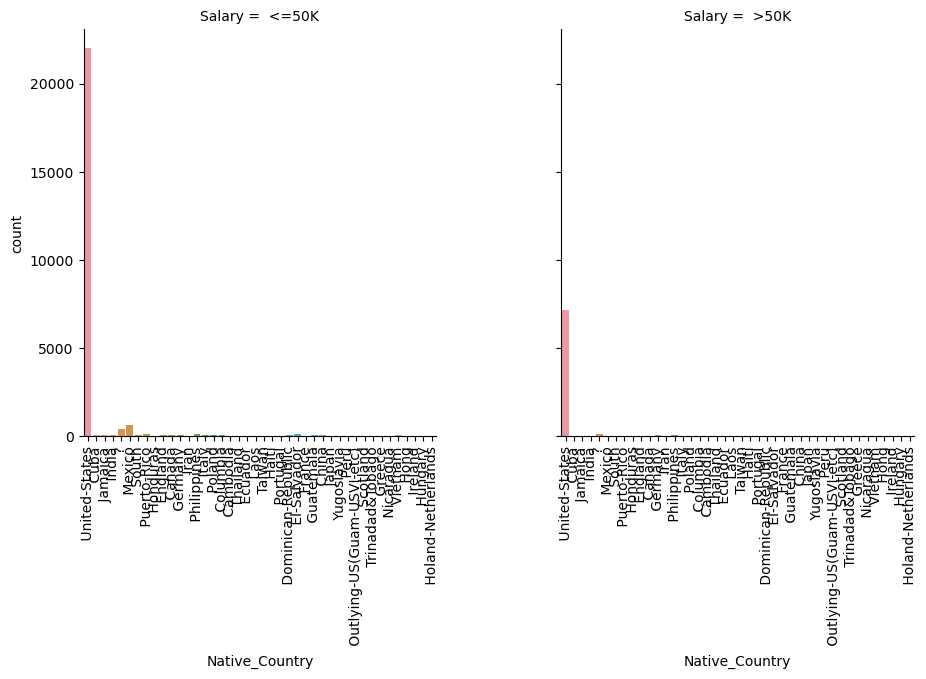

In [78]:
for i in cat_var:
    if i == "occupation" or i == "Native_Country":
        a = sns.catplot(x = i, col = "Salary", data = df, kind = "count")
        a.set_xticklabels(labels=df[i].unique(), rotation=90)
        plt.show()
       # print(pd.crosstab(df[i], df["Salary"]))
    elif i == "Gender":
        plt.pie(df["Gender"].value_counts(), labels = df["Gender"].unique())
        plt.title("Gender Bifucation")
       # print(df["Gender"].value_counts()/len(df["Gender"]))
    else:
        plt.show(sns.catplot(x = i, col = "Salary", data = df, kind = "count", palette = "rocket"))
      #  print(pd.crosstab(df[i], df["Gender"]))

In [79]:
plotdf = df[(df["Salary"] == " >50K")]
fig = px.sunburst(plotdf, path=["Gender","education","Martial_status","workclass","relationship","race"])
fig.show()

# Step 4 :- Data Converting as per Alogrithm 

In [80]:
df.describe()

,Age,fnlwgt,hours_per_week
count,32561.000000,32561.000000,32561.000000
mean,38.555603,186829.079236,41.202451
std,13.556130,95129.625135,6.187005
min,17.000000,12285.000000,32.500000
25%,28.000000,117827.000000,40.000000
50%,37.000000,178356.000000,40.000000
75%,48.000000,237051.000000,45.000000
max,78.000000,415887.000000,52.500000


In [81]:
for i in df:
    if df[i].dtypes in ("float64","int64"):
        bins= [df[i].min(),df[i].quantile(0.25),df[i].quantile(0.50),df[i].max()]
        df[i]=pd.cut(df[i], bins=bins,duplicates="drop",include_lowest=True)

In [82]:
df.head()

,Age,workclass,fnlwgt,education,Martial_status,occupation,relationship,race,Gender,hours_per_week,Native_Country,Salary
0,"(37.0, 78.0]",Government,"(12284.999, 117827.0]",Bachelors,Single,Adm-clerical,Not-in-family,White,Male,"(32.499, 40.0]",United-States,<=50K
1,"(37.0, 78.0]",Self Employed,"(12284.999, 117827.0]",Bachelors,Married,Exec-managerial,Family,White,Male,"(32.499, 40.0]",United-States,<=50K
2,"(37.0, 78.0]",Private,"(178356.0, 415887.0]",Bachelors,Divorced,Handlers-cleaners,Not-in-family,White,Male,"(32.499, 40.0]",United-States,<=50K
3,"(37.0, 78.0]",Private,"(178356.0, 415887.0]",High School,Married,Handlers-cleaners,Family,Black,Male,"(32.499, 40.0]",United-States,<=50K
4,"(16.999, 28.0]",Private,"(178356.0, 415887.0]",Bachelors,Married,Prof-specialty,Family,Black,Female,"(32.499, 40.0]",Cuba,<=50K


In [83]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)
df.head(3)
# label in ascending order

,Age,workclass,fnlwgt,education,Martial_status,occupation,relationship,race,Gender,hours_per_week,Native_Country,Salary
0,2,0,0,0,2,1,1,4,1,0,39,0
1,2,3,0,0,1,4,0,4,1,0,39,0
2,2,2,2,0,0,6,1,4,1,0,39,0


In [84]:
df_combined = df.copy()

# Step 5 :- Data Partition

In [85]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = df_combined.drop(['Salary'],axis=1)
train_y = df_combined['Salary']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.3,random_state=231)

# Step 6 :- Model Building

In [86]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier
model= BernoulliNB(alpha=0)  # Laplace smoothing (alpha) = 0 

#Train the model using the training sets
model.fit(X_train, y_train)

BernoulliNB(alpha=0)

# Step 7 : Predictions on Train Dataset


In [97]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Age,workclass,fnlwgt,education,Martial_status,occupation,relationship,race,Gender,hours_per_week,Native_Country,Salary
3635,0,2,2,5,1,7,0,3,1,0,39,0
9545,2,2,2,0,0,8,3,4,0,0,39,0
7739,2,2,2,5,1,3,0,4,1,0,26,0
15141,1,3,2,1,2,10,1,4,1,1,39,1
15341,1,2,1,3,1,12,0,4,1,1,39,1


In [88]:
train['Probability']=model.predict_proba(X_train)[:,1]
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0)  #thershold  >0.7
train.head()

,Age,workclass,fnlwgt,education,Martial_status,occupation,relationship,race,Gender,hours_per_week,Native_Country,Salary,Probability,Predicted
3635,0,2,2,5,1,7,0,3,1,0,39,0,0.083444,0
9545,2,2,2,0,0,8,3,4,0,0,39,0,0.011454,0
7739,2,2,2,5,1,3,0,4,1,0,26,0,0.481703,0
15141,1,3,2,1,2,10,1,4,1,1,39,1,0.360693,0
15341,1,2,1,3,1,12,0,4,1,1,39,1,0.749887,1


# Step 8 : Model Performance Metrics

In [89]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Salary'])
print(matrix)

[[16206  3702]
 [ 1162  1722]]


In [90]:
Accuracy_Train=((16206+1722)/(22792)*100)
print(Accuracy_Train)

78.65917865917866


### Train

In [91]:
from sklearn.metrics import classification_report
print(classification_report(train['Salary'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     17368
           1       0.60      0.32      0.41      5424

    accuracy                           0.79     22792
   macro avg       0.71      0.63      0.64     22792
weighted avg       0.76      0.79      0.76     22792



# Step 7 : Predictions on Test Dataset


In [92]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Age,workclass,fnlwgt,education,Martial_status,occupation,relationship,race,Gender,hours_per_week,Native_Country,Salary
21543,2,0,1,2,1,3,0,4,1,0,39,0
2166,2,2,2,0,1,12,0,4,1,0,39,0
31699,2,3,1,0,1,5,0,4,1,1,39,0
14002,0,3,1,0,2,8,1,4,0,0,39,0
3008,0,2,0,0,2,3,2,4,1,0,39,0


In [93]:
test['Probability']=model.predict_proba(X_test)[:,1]
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0)  #thershold  >0.7
test.head()

,Age,workclass,fnlwgt,education,Martial_status,occupation,relationship,race,Gender,hours_per_week,Native_Country,Salary,Probability,Predicted
21543,2,0,1,2,1,3,0,4,1,0,39,0,0.563898,0
2166,2,2,2,0,1,12,0,4,1,0,39,0,0.424484,0
31699,2,3,1,0,1,5,0,4,1,1,39,0,0.704087,1
14002,0,3,1,0,2,8,1,4,0,0,39,0,0.003946,0
3008,0,2,0,0,2,3,2,4,1,0,39,0,0.012902,0


# Step 8 : Model Performance Metrics

In [94]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(test['Predicted'],test['Salary'])
print(matrix)

[[6831 1663]
 [ 521  754]]


In [95]:
Accuracy_Train=((6831 +754)/(9769)*100)
print(Accuracy_Train)

77.64356638345788


### Test

In [96]:
from sklearn.metrics import classification_report
print(classification_report(test['Salary'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7352
           1       0.59      0.31      0.41      2417

    accuracy                           0.78      9769
   macro avg       0.70      0.62      0.64      9769
weighted avg       0.75      0.78      0.75      9769



# Finished